# 插值

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

设置 **`Numpy`** 浮点数显示格式：

In [2]:
np.set_printoptions(precision=2, suppress=True)

从文本中读入数据，数据来自 http://kinetics.nist.gov/janaf/html/C-067.txt ，保存为结构体数组：

In [3]:
data = np.genfromtxt("JANAF_CH4.txt", 
                  delimiter="\t", # TAB 分隔
                  skiprows=1,     # 忽略首行
                  names=True,     # 读入属性
                  missing_values="INFINITE",  # 缺失值
                  filling_values=np.inf)      # 填充缺失值

显示部分数据：

In [4]:
for row in data[:7]:
    print "{}\t{}".format(row['TK'], row['Cp'])
print "...\t..."

0.0	0.0
100.0	33.258
200.0	33.473
250.0	34.216
298.15	35.639
300.0	35.708
350.0	37.874
...	...


绘图：

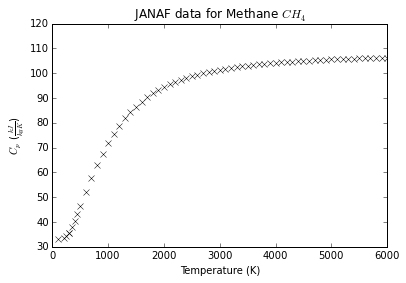

In [5]:
p = plt.plot(data['TK'], data['Cp'], 'kx')
t = plt.title("JANAF data for Methane $CH_4$")
a = plt.axis([0, 6000, 30, 120])
x = plt.xlabel("Temperature (K)")
y = plt.ylabel(r"$C_p$ ($\frac{kJ}{kg K}$)")

## 插值

假设我们要对这组数据进行插值。

先导入一维插值函数 `interp1d`：

    interp1d(x, y)

In [6]:
from scipy.interpolate import interp1d

In [7]:
ch4_cp = interp1d(data['TK'], data['Cp'])

`interp1d` 的返回值可以像函数一样接受输入，并返回插值的结果。

单个输入值，注意返回的是数组：

In [8]:
ch4_cp(382.2)

array(39.565144000000004)

输入数组，返回的是对应的数组：

In [9]:
ch4_cp([32.2,323.2])

array([ 10.71,  36.71])

默认情况下，输入值要在插值允许的范围内，否则插值会报错：

In [10]:
ch4_cp(8752)

ValueError: A value in x_new is above the interpolation range.

但我们可以通过参数设置允许超出范围的值存在：

In [11]:
ch4_cp = interp1d(data['TK'], data['Cp'], 
                  bounds_error=False)

不过由于超出范围，所以插值的输出是非法值：

In [12]:
ch4_cp(8752)

array(nan)

可以使用指定值替代这些非法值：

In [13]:
ch4_cp = interp1d(data['TK'], data['Cp'], 
                  bounds_error=False, fill_value=-999.25)

In [14]:
ch4_cp(8752)

array(-999.25)

### 线性插值

`interp1d` 默认的插值方法是线性，关于线性插值的定义，请参见：

- 维基百科-线性插值： https://zh.wikipedia.org/wiki/%E7%BA%BF%E6%80%A7%E6%8F%92%E5%80%BC
- 百度百科-线性插值： http://baike.baidu.com/view/4685624.htm

其基本思想是，已知相邻两点 $x_1,x_2$ 对应的值 $y_1,y_2$ ，那么对于 $(x_1,x_2)$ 之间的某一点 $x$ ，线性插值对应的值 $y$ 满足：点 $(x,y)$ 在 $(x_1,y_1),(x_2,y_2)$ 所形成的线段上。

应用线性插值：

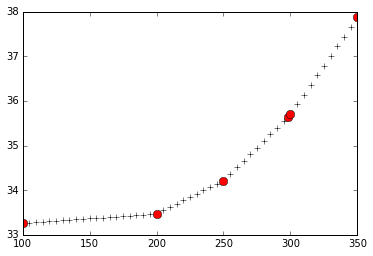

In [15]:
T = np.arange(100,355,5)
plt.plot(T, ch4_cp(T), "+k")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

其中红色的圆点为原来的数据点，黑色的十字点为对应的插值点，可以明显看到，相邻的数据点的插值在一条直线上。

### 多项式插值

我们可以通过 `kind` 参数来调节使用的插值方法，来得到不同的结果：

- `nearest` 最近邻插值
- `zero` 0阶插值
- `linear` 线性插值
- `quadratic` 二次插值
- `cubic` 三次插值
- `4,5,6,7` 更高阶插值

最近邻插值：

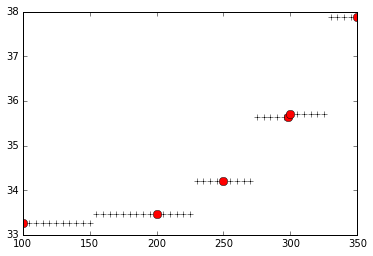

In [16]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="nearest")
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

0阶插值：

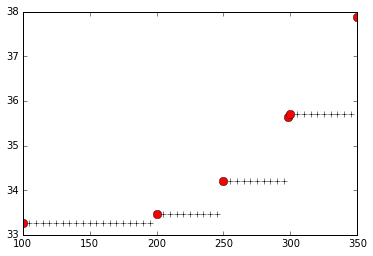

In [17]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="zero")
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

二次插值：

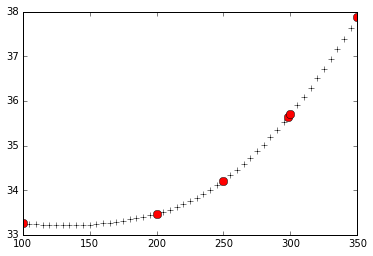

In [18]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="quadratic")
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

三次插值：

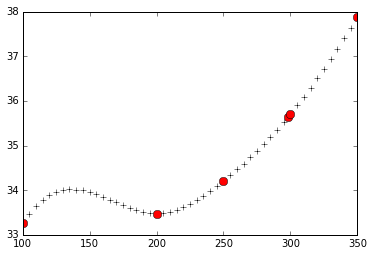

In [19]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind="cubic")
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

事实上，我们可以使用更高阶的多项式插值，只要将 `kind` 设为对应的数字即可：

四次多项式插值：

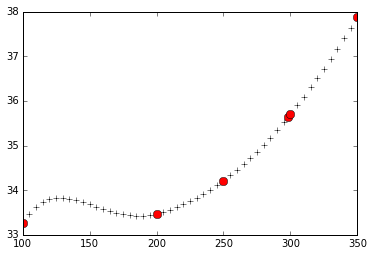

In [20]:
cp_ch4 = interp1d(data['TK'], data['Cp'], kind=4)
p = plt.plot(T, cp_ch4(T), "k+")
p = plt.plot(data['TK'][1:7], data['Cp'][1:7], 'ro', markersize=8)

可以参见：

- 维基百科-多项式插值：https://zh.wikipedia.org/wiki/%E5%A4%9A%E9%A1%B9%E5%BC%8F%E6%8F%92%E5%80%BC
- 百度百科-插值法：http://baike.baidu.com/view/754506.htm

对于二维乃至更高维度的多项式插值：

In [21]:
from scipy.interpolate import interp2d, interpnd

其使用方法与一维类似。

### 径向基函数

关于径向基函数，可以参阅：
- 维基百科-Radial basis fucntion：https://en.wikipedia.org/wiki/Radial_basis_function

径向基函数，简单来说就是点 $x$ 处的函数值只依赖于 $x$ 与某点 $c$ 的距离：

$$\Phi(x,c) = \Phi(\|x-c\|)$$

In [22]:
x = np.linspace(-3,3,100)

常用的径向基（`RBF`）函数有：

高斯函数：

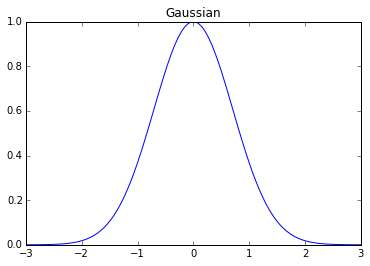

In [23]:
plt.plot(x, np.exp(-1 * x **2))
t = plt.title("Gaussian")

`Multiquadric` 函数：

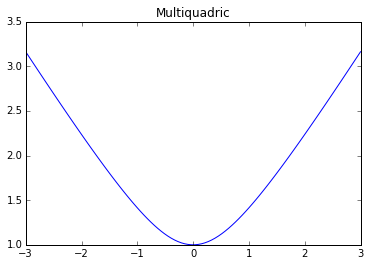

In [24]:
plt.plot(x, np.sqrt(1 + x **2))
t = plt.title("Multiquadric")

`Inverse Multiquadric` 函数：

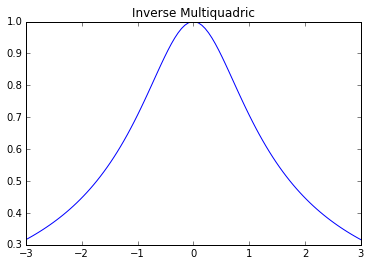

In [25]:
plt.plot(x, 1. / np.sqrt(1 + x **2))
t = plt.title("Inverse Multiquadric")

### 径向基函数插值

对于径向基函数，其插值的公式为：

$$
f(x) = \sum_j n_j \Phi(\|x-x_j\|)
$$

我们通过数据点 $x_j$ 来计算出 $n_j$ 的值，来计算 $x$ 处的插值结果。

In [26]:
from scipy.interpolate.rbf import Rbf

使用 `multiquadric` 核的：

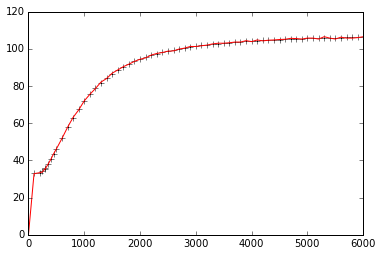

In [27]:
cp_rbf = Rbf(data['TK'], data['Cp'], function = "multiquadric")
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')

使用 `gaussian` 核：

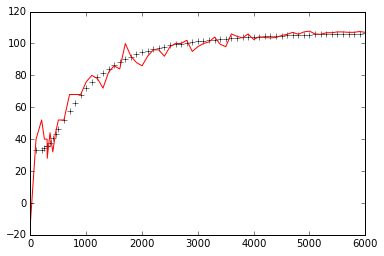

In [28]:
cp_rbf = Rbf(data['TK'], data['Cp'], function = "gaussian")
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')

使用 `nverse_multiquadric` 核：

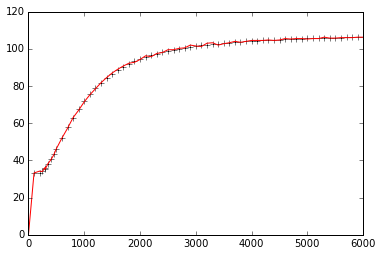

In [29]:
cp_rbf = Rbf(data['TK'], data['Cp'], function = "inverse_multiquadric")
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')

不同的 `RBF` 核的结果也不同。

### 高维 `RBF` 插值

In [30]:
from mpl_toolkits.mplot3d import Axes3D

三维数据点：

In [31]:
x, y = np.mgrid[-np.pi/2:np.pi/2:5j, -np.pi/2:np.pi/2:5j]
z = np.cos(np.sqrt(x**2 + y**2))

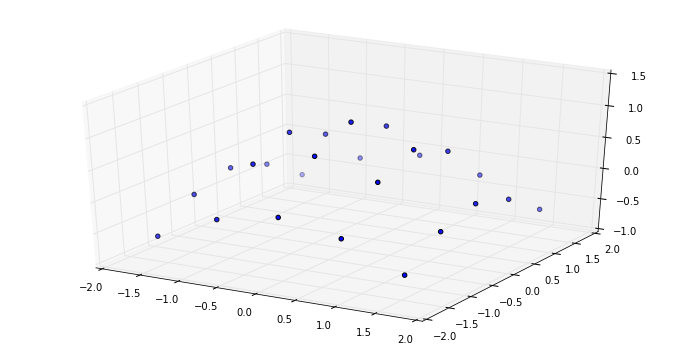

In [32]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection="3d")
ax.scatter(x,y,z)

3维 `RBF` 插值：

In [33]:
zz = Rbf(x, y, z)

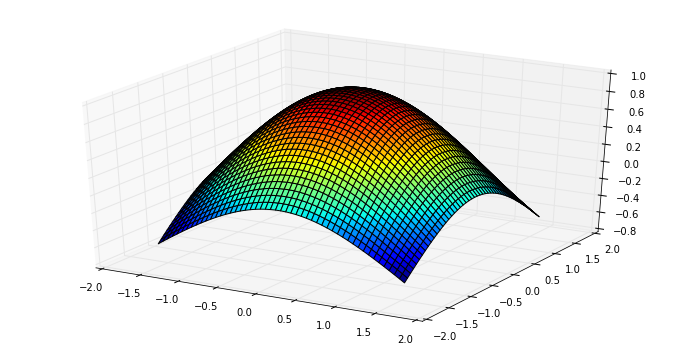

In [34]:
xx, yy = np.mgrid[-np.pi/2:np.pi/2:50j, -np.pi/2:np.pi/2:50j]
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection="3d")
ax.plot_surface(xx,yy,zz(xx,yy),rstride=1, cstride=1, cmap=plt.cm.jet)